In [10]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [6]:
with open('9thgrade_sentences.txt', 'r', encoding = 'utf-8') as f1:
    lines = f1.readlines()
    raw_text1 = [line.rstrip() for line in lines]
        
with open('10thgrade_sentences.txt', 'r', encoding = "utf-8") as f2:
    lines = f2.readlines()
    raw_text2 = [line.rstrip() for line in lines]
        
with open('11thgrade_sentences.txt', 'r', encoding = "utf-8") as f3:
    lines = f3.readlines()
    raw_text3 = [line.rstrip() for line in lines]
        
with open('12thgrade_sentences.txt', 'r', encoding = "utf-8") as f4:
    lines = f4.readlines()
    raw_text4 = [line.rstrip() for line in lines]

In [3]:
raw_text4 = raw_text4[30:-20]

In [4]:
sentiments12 = []
for sent in raw_text4:
    if len(sent) < 510:
        classified = sa(sent)
        result = classified[0]['label']
        sentiments12.append(result)
    else:
        continue
    

In [5]:
print("Number of positive sentences:", sentiments12.count('positive'))
print("Number of negative sentences:", sentiments12.count('negative'))

Number of positive sentences: 79
Number of negative sentences: 414


In [13]:
sa("mozilla benim kullandığım en yavaş ve kullanışsız browser")

[{'label': 'negative', 'score': 0.9989204406738281}]

In [11]:
sentiments11 = []
for sent in raw_text3:
    if len(sent) < 510:
        classified = sa(sent)
        result = classified[0]['label']
        sentiments11.append(result)
    else:
        continue

In [13]:
print("Number of positive sentences:", sentiments11.count('positive'))
print("Number of negative sentences:", sentiments11.count('negative'))

Number of positive sentences: 65
Number of negative sentences: 159


In [14]:
sentiments10 = []
for sent in raw_text2:
    if len(sent) < 510:
        classified = sa(sent)
        result = classified[0]['label']
        sentiments10.append(result)
    else:
        continue

In [15]:
print("Number of positive sentences:", sentiments10.count('positive'))
print("Number of negative sentences:", sentiments10.count('negative'))

Number of positive sentences: 68
Number of negative sentences: 125


In [16]:
sentiments9 = []
for sent in raw_text2:
    if len(sent) < 510:
        classified = sa(sent)
        result = classified[0]['label']
        sentiments9.append(result)
    else:
        continue

In [17]:
print("Number of positive sentences:", sentiments9.count('positive'))
print("Number of negative sentences:", sentiments9.count('negative'))

Number of positive sentences: 68
Number of negative sentences: 125


# Plotting

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

sentiments9_df = pd.DataFrame(sentiments9, columns = ["Class"])
sentiments9_df["Grade"] = 9

sentiments10_df = pd.DataFrame(sentiments10, columns = ["Class"])
sentiments10_df["Grade"] = 10

sentiments11_df = pd.DataFrame(sentiments11, columns = ["Class"])
sentiments11_df["Grade"] = 11

sentiments12_df = pd.DataFrame(sentiments12, columns = ["Class"])
sentiments12_df["Grade"] = 12

frames = [sentiments9_df, sentiments10_df, sentiments11_df, sentiments12_df]
bert_sentiment_frame = pd.concat(frames)

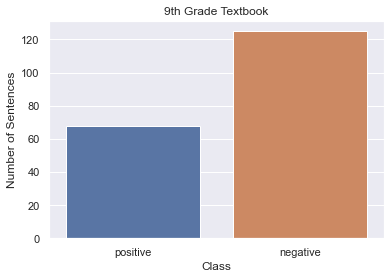

In [57]:
var_order = ["positive", "negative"]

plot9 = sns.countplot(x="Class", data=sentiments9_df, order = var_order)
plot9.set(xlabel="Class", ylabel = "Number of Sentences", title='9th Grade Textbook')
plt.savefig('9th_berturk.png', dpi=900, bbox_inches='tight')

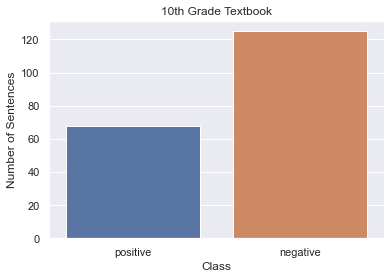

In [56]:
plot10 = sns.countplot(x="Class", data=sentiments10_df, order = var_order)
plot10.set(xlabel="Class", ylabel = "Number of Sentences", title='10th Grade Textbook')

plt.savefig('10th_berturk.png', dpi=900, bbox_inches='tight')

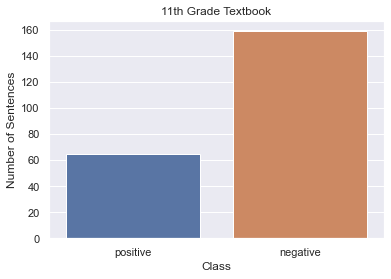

In [55]:
plot11 = sns.countplot(x="Class", data=sentiments11_df, order = var_order)
plot11.set(xlabel="Class", ylabel = "Number of Sentences", title='11th Grade Textbook')

plt.savefig('11th_berturk.png', dpi=900, bbox_inches='tight')

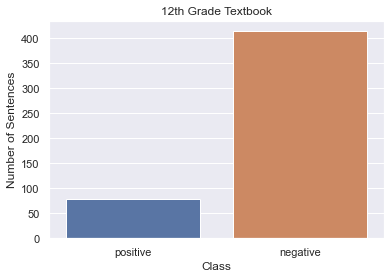

In [54]:
plot12 = sns.countplot(x="Class", data=sentiments12_df, order = var_order)
plot12.set(xlabel="Class", ylabel = "Number of Sentences", title='12th Grade Textbook')

plt.savefig('12th_berturk.png', dpi=900, bbox_inches='tight')

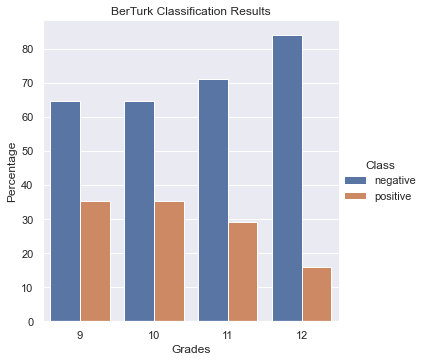

In [53]:
x, y = 'Grade', 'Class'

plot_collective = (bert_sentiment_frame
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))

plot_collective.set(xlabel="Grades", ylabel = "Percentage", title='BerTurk Classification Results')

plt.savefig('berturk_class.png', dpi=900, bbox_inches='tight')